In [2]:
%pwd

'c:\\Users\\44787\\Desktop\\projects\\End-To-End-MLOps-Project\\notebooks'

In [3]:
import os

os.chdir("../")
%pwd

'c:\\Users\\44787\\Desktop\\projects\\End-To-End-MLOps-Project'

**Import libraries**

In [6]:
from src.utils.common import read_yaml
from src.constants import PARAMS_FILE_PATH

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
## define csv file path

params_file = read_yaml(PARAMS_FILE_PATH)
dataset_path = params_file.data_load.dataset_path
dataset_path

[2024-05-21 21:30:04,562: INFO: common: yaml file: params.yaml loaded successfully]


'data/raw/healthcare-dataset-stroke-data.csv'

**load the dataset**

In [9]:
df = pd.read_csv(dataset_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.drop(['id'], inplace=True, axis=1)
df.shape

(5110, 11)

**statistical analysis**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


**checking the number of unique values of each columns**

In [12]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

**check data type and null values**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Check duplicate values**

In [14]:
df.duplicated().sum()

0

**cheking for null values**

In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**check dataset whether balance or not** 

In [16]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**check columns (numerical and categorical) and unique values of each columns**

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [18]:
for col in df.columns:
    print(f"'{col}': having type *{df[col].dtype}* \n, has {df[col].unique()} unique values\n")

'gender': having type *object* 
, has ['Male' 'Female' 'Other'] unique values

'age': having type *float64* 
, has [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00

In [19]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [20]:
i = df[df.gender == 'Other'].index
df = df.drop(i)

df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

**checking for outliers**

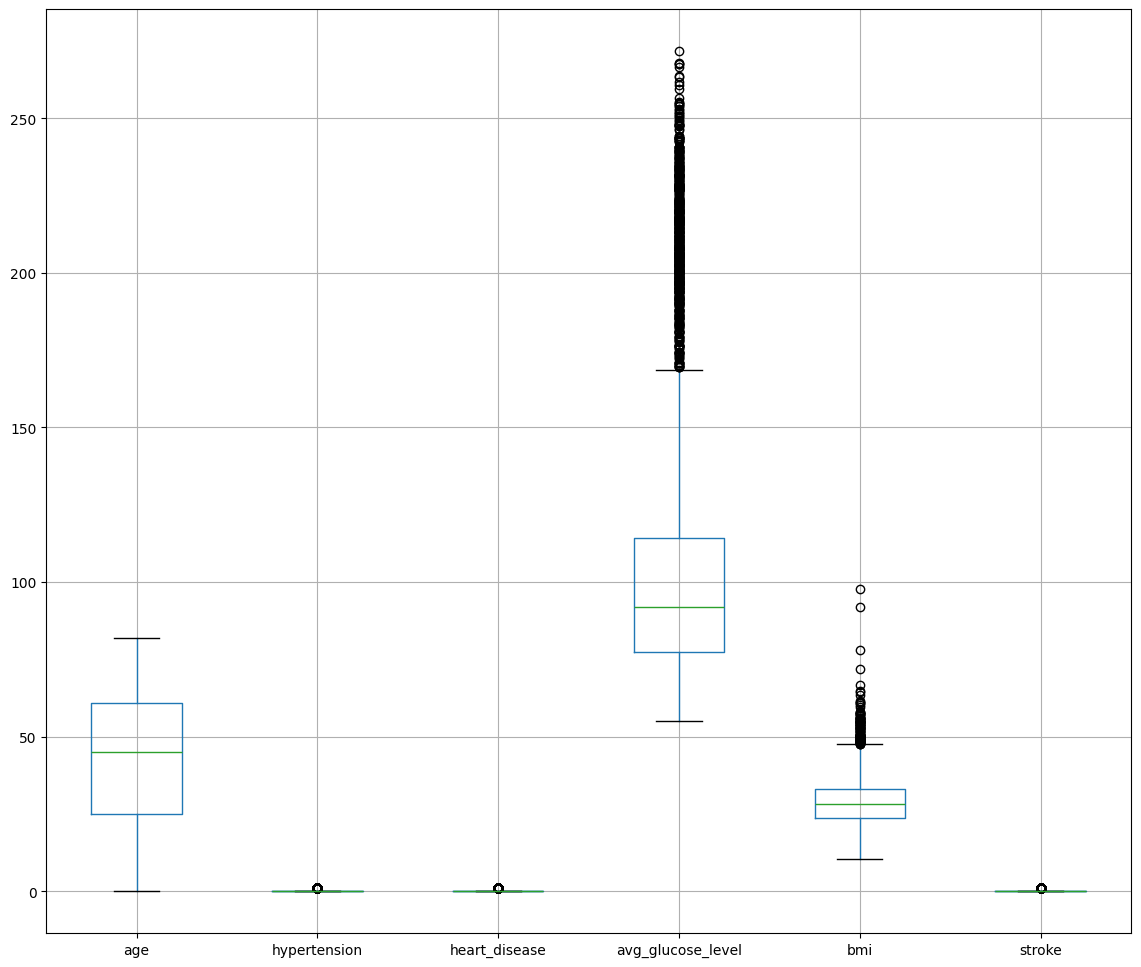

In [21]:
df.boxplot(figsize=(14,12));

**visualization**

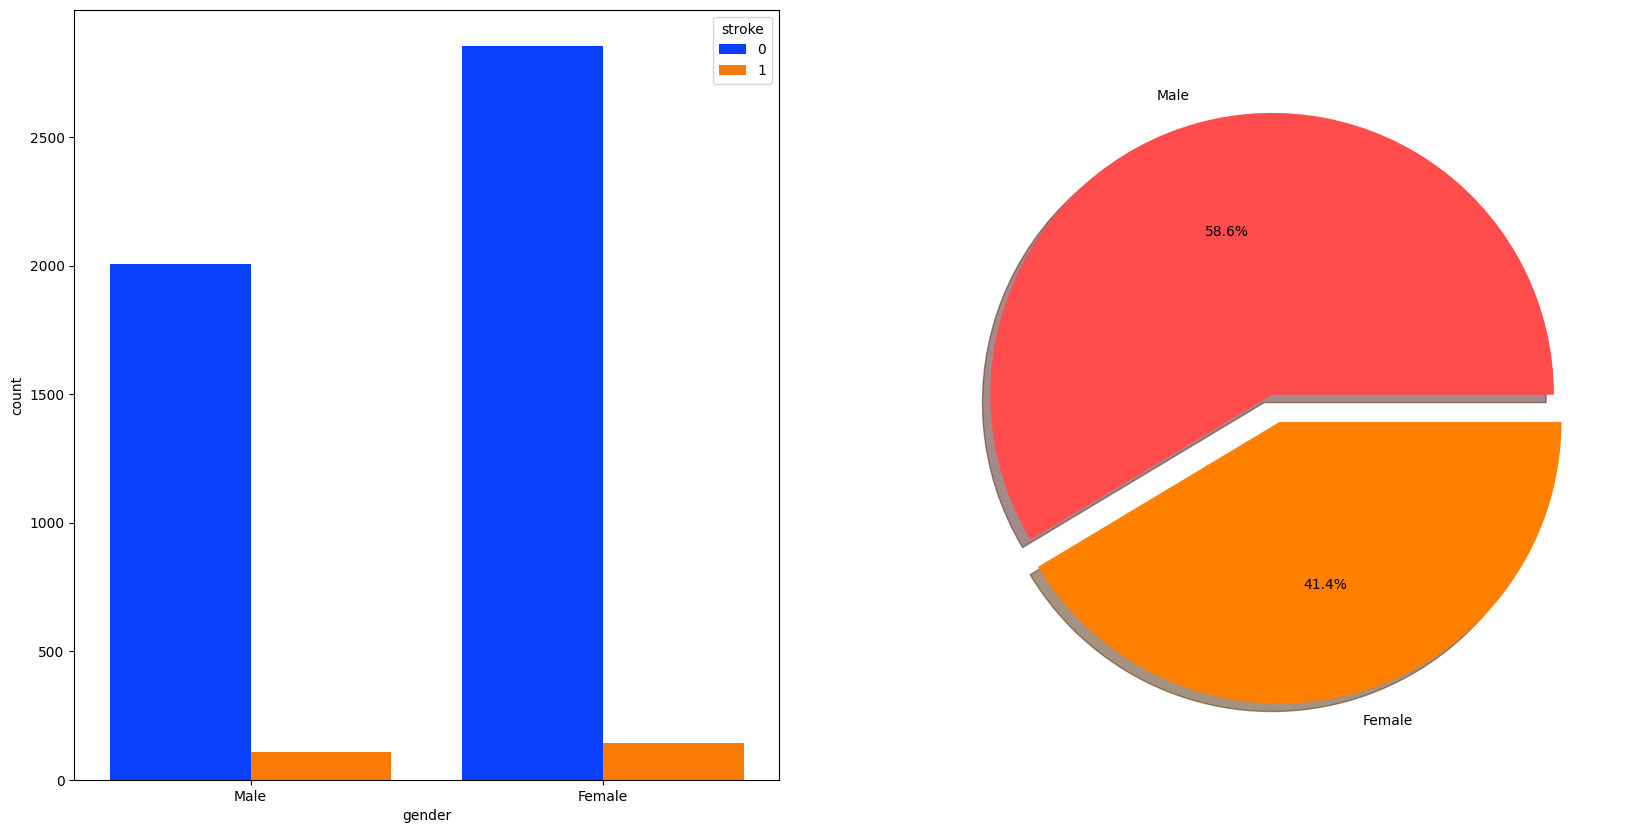

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95, hue="stroke")
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [23]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x="hypertension", hue="stroke");

[2024-05-21 21:32:01,457: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


[2024-05-21 21:32:01,467: INFO: category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


In [24]:
sns.histplot(data=df, x="age", hue="stroke");

In [26]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke");

<Axes: xlabel='hypertension', ylabel='count'>

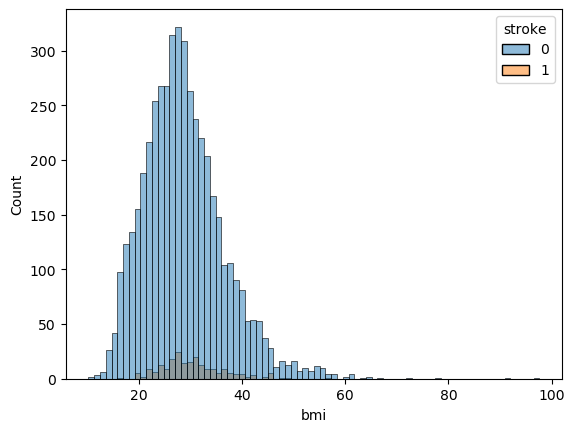

In [23]:
sns.histplot(data=df, x="bmi", hue="stroke");

**Check the corr**

In [28]:
plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True);

<Figure size 1000x800 with 0 Axes>

### Insight

**Attribute Information**

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not


**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

**Feature Engineering require**

1. remove column ->(id)
2. handle null values ->(bmi)
3. handle imbalance dataset
4. handle outliers
5. Encoding categorical values